In [10]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import Bio

sys.path.insert(0,'../')
from PhicoreModules import parse_genbank, mean, median, mode, visualise

In [20]:
def coding_regions(record: Bio.SeqRecord.SeqRecord, verbose: bool = False) -> list[int]:
    """
    calculate a list of ints of the regions that are coding for the record
    
    :param record: The genbank record entry (ie. one sequence record)
    :param verbose: more output
    :return : a list of 1's and 0's. 1: the base is encoding. 0: the base is not
    """
    
    seqlen = len(entry.seq)
    coding = [0 for i in range(seqlen)]
    for feat in entry.features:
        if feat.type != 'CDS':
            print(f"Skipped feature of type: {feat.type}", file=sys.stderr)
            continue
        (start, stop, strand) = (feat.location.start.position, feat.location.end.position, feat.strand)
        for i in range(start, stop):
            coding[i] = 1
    return coding

In [6]:
def coding_stats(coding: list[int], window: int, step: int, verbose: bool = False) -> dict[str, int]:
    """
    Calculate the statistics for this coding window
    :param coding: the list of coding/not coding regions(a list of 1's and 0's)
    :param window: the window to calculate the average across
    :param step: the step size between windows
    :param verbose: more output
    :return : a dictionary summaring the statistics
    """
    
    winbeg = 0
    allcd = {}

    while winbeg + step + window < len(coding):
        winend = winbeg + window
        cd = sum(coding[winbeg:winend])/window
        allcd[winbeg] = cd
        winbeg += step
    
    return {
        'mean': sum(allcd.values())/len(allcd.values()),
        'median' : median(list(allcd.values())),
        'mode': mode(allcd.values()),
        'minimum': min(allcd.values()),
        'maximum': max(allcd.values()),
        'all': allcd
    }
        

In [21]:
file='../genbank/Bc01-TAA.gbk'
seq = parse_genbank(file)

In [22]:
for entry in seq.records:
    coding = coding_regions(entry)
    stats = coding_stats(coding, 10000, 150)
    print(stats)

{'mean': 0.9679961666666649, 'median': 0.9711, 'mode': 0.9962, 'minimum': 0.874, 'maximum': 1.0, 'all': {0: 0.9859, 150: 0.9949, 300: 0.9949, 450: 0.9949, 600: 0.9949, 750: 0.9949, 900: 0.9949, 1050: 0.9949, 1200: 0.9949, 1350: 0.9949, 1500: 0.9949, 1650: 0.9949, 1800: 0.9949, 1950: 0.9949, 2100: 0.9949, 2250: 0.9949, 2400: 0.9974, 2550: 0.9968, 2700: 0.9968, 2850: 0.9968, 3000: 0.9968, 3150: 0.9968, 3300: 0.9968, 3450: 0.9968, 3600: 0.9968, 3750: 0.9968, 3900: 0.9968, 4050: 0.9968, 4200: 0.9968, 4350: 0.9968, 4500: 0.9871, 4650: 0.9871, 4800: 0.9871, 4950: 0.9876, 5100: 0.9876, 5250: 0.9889, 5400: 0.9889, 5550: 0.9888, 5700: 0.9888, 5850: 0.9887, 6000: 0.9887, 6150: 0.9887, 6300: 0.9887, 6450: 0.9852, 6600: 0.9786, 6750: 0.9786, 6900: 0.9786, 7050: 0.9786, 7200: 0.9786, 7350: 0.9786, 7500: 0.9786, 7650: 0.9786, 7800: 0.9752, 7950: 0.976, 8100: 0.976, 8250: 0.976, 8400: 0.976, 8550: 0.976, 8700: 0.976, 8850: 0.976, 9000: 0.976, 9150: 0.976, 9300: 0.9692, 9450: 0.9689, 9600: 0.9689, 975

/home/edwa0468/.local/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(
Skipped feature of type: source


In [23]:
gbkdir = '../genbank/'
data = {}
for file in os.listdir(gbkdir):
    if not 'Bc01-' in file:
        continue
    seq = parse_genbank(os.path.join(gbkdir, file))
    
    for entry in seq.records:
        coding = coding_regions(entry)
        stats = coding_stats(coding, 2000, 150)
        data[file] = [stats['mean'], stats['median'], stats['mode'], stats['minimum'], stats['maximum']]
    
df = pd.DataFrame.from_dict(data, orient='index', columns=['mean', 'median', 'mode', 'minimum', 'maximum'])

Skipped feature of type: source
Skipped feature of type: source
Skipped feature of type: source
Skipped feature of type: source
Skipped feature of type: source
Skipped feature of type: source
Skipped feature of type: source


In [18]:
df

,mean,median,mode,minimum,maximum
Bc01-TAA.gbk,0.965650,0.9845,1.0,0.7805,1.0
Bc01-TAG-TAA.gbk,0.965387,0.9920,1.0,0.6805,1.0
Bc01-TAG-TGA-TAA.gbk,0.961600,0.9905,1.0,0.6210,1.0
Bc01-TAG-TGA.gbk,0.973572,0.9990,1.0,0.7875,1.0
Bc01-TAG.gbk,0.972410,0.9970,1.0,0.8580,1.0
Bc01-TGA-TAA.gbk,0.968794,0.9895,1.0,0.6865,1.0
Bc01-TGA.gbk,0.981709,1.0000,1.0,0.8845,1.0


<AxesSubplot:>

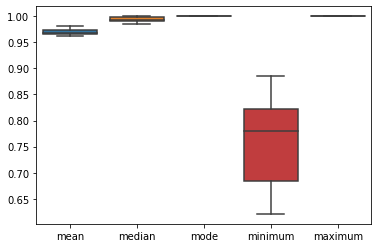

In [19]:
sns.boxplot(data=df)